In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab01.ipynb")

<table style="width: 100%;" id="nb-header">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, Fall 2024<br>
            Dr. Eric Van Dusen <br>
        Amal Bhatnagar <br>
        Alan Liang <br>
        Akhil Venkatesh <br>
</table>

# Lab 1: Demand

In [2]:
import numpy as np
from datascience import *
import sympy

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact

solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"

def plot_equation(equation, price_start, price_end, label=None):
    plot_prices = [price_start, price_end]
    plot_quantities = [equation.subs(list(equation.free_symbols)[0], c) for c in plot_prices]
    plt.plot(plot_prices, plot_quantities, label=label)
    
def plot_intercept(eq1, eq2):
    ex = sympy.solve(eq1-eq2)[0]
    why = eq1.subs(list(eq1.free_symbols)[0], ex)
    plt.scatter([ex], [why])
    return (ex, why)

## Demand Curve for Beef

In today's lab, we will explore the demand curve for beef across time. The data is originally from the US Department of Agriculture and examines how the price varies between 1977 and 1999. 

For the purposes of this assignment, the quantity of beef demanded is measured in millions of pounds, while price is measured in average cents per pound. 

Note that throughout this exercise, we will ignore the effects of inflation. 

Remember, if you're feeling stuck on a problem, please refer to [these pages]( https://data-88e.github.io/textbook/content/01-demand/02-example.html)!

In [3]:
beef = Table.read_table('beef.csv')
beef

Year,Quarter,Quantity,Price
1977,1,22.9976,142.167
1977,2,22.6131,143.933
1977,3,23.4054,146.5
1977,4,22.7401,150.8
1978,1,22.0441,160
1978,2,21.7602,182.533
1978,3,21.6064,186.2
1978,4,21.8814,186.433
1979,1,20.5086,211.7
1979,2,19.0408,231.5


To construct the demand curve, let's first examine what the relationship between price and quantity is. We would expect to see a downward-sloping line between price and quantity; if a product's price increases, consumers will purchase less of it, and if a product's price decreases, then consumers will purchase more of it.

<!-- BEGIN QUESTION -->

**Question 1:** 
Create a scatterplot with a best-fit line (using `fit_line = True`) across the points. Trend-lines are helpful because they consolidate all the datapoints into a single line, helping us better understand the relationship between the two variables. 


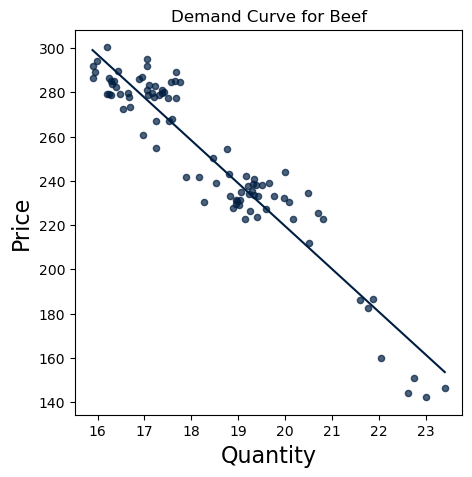

In [5]:
beef.scatter("Quantity", "Price", fit_line = True)
plt.title("Demand Curve for Beef");

<!-- END QUESTION -->

We will now quantify our demand curve using the [`np.polyfit(...)`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) function, which returns the coefficients of a fitted $d$-degree polynomial. 

`np.polyfit` takes 3 parameters
- array of x-coordinates
- array of y-coordinates
- degree of polynomial 

Because we are looking for a **linear** function to serve as the demand curve, we will use 1 as the degree of polynomial. It will therefore return an array of size 2, where the first element is the `slope` and the second is the `y-intercept`.

**Question 2.1:** Create a non-log demand curve that expresses the price of beef in terms of the quantity demanded (using quantity as $x$ and price as $y$) by using `np.polyfit`. Assign the results to `non_log_demand_params_1`. 



In [8]:
non_log_demand_params_1 = np.polyfit(beef.column("Quantity"), beef.column("Price"), 1)
non_log_demand_params_1

array([ -19.37480257,  607.0007679 ])

In [9]:
grader.check("q2_1")

q2_1 results: All test cases passed!

Your answer should show that the $m$ variable (slope) is -19.37 and b variable (y-intercept) is 607. Using the $y = mx + b$ template above, then our demand curve would be $y = -19.37x + 607$

**Question 2.2:** Assign the number (i.e `1`, `2`, `3`, or `4`) to `slope_intercept` that best represents the interpretation of the slope and intercept terms of the demand curve in question `2.1`.

*Hint*: watch [this video](https://www.youtube.com/watch?v=LwLh6ax0zTE)

1. For a decrease in 19.37 million pounds of beef demanded per quarter, we would expect to see a decrease in the price per pound of beef by 1 cent. At a price of 607 cents per pound, we would expect there to be 0 pounds of beef demanded.
2. For an increase in 1 million pounds of beef demanded per quarter, we would expect to see a decrease in the price per pound of beef by 19.37 cents. At a price of 0 cents per pound, we would expect there to be 0 pounds of beef demanded.
3. For an increase in 1 million pounds of beef demanded per quarter, we would expect to see a decrease in the price per pound of beef by 19.37 cents. At a price of 607 cents per pound, we would expect there to be 0 pounds of beef demanded.
4. For a decrease in 1 million pounds of beef demanded per quarter, we would expect to see an decrease in the price per pound of beef by 19.37 cents. At a price of 607 cents per pound, we would expect there to be 0 pounds of beef demanded.

In [10]:
slope_intercept = 4

In [11]:
grader.check("q2_2")

q2_2 results: All test cases passed!

Let's visualize our non-log demand curve from question 2:

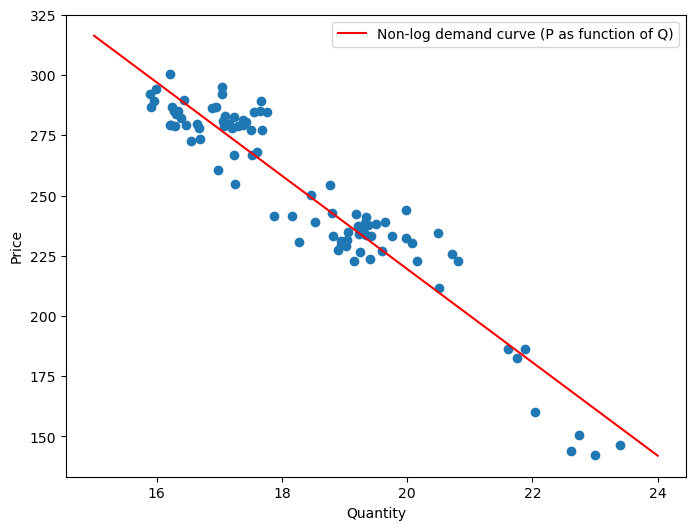

In [12]:
quantities = np.arange(15,25)
predicted_prices_non_log = non_log_demand_params_1[0] * quantities + non_log_demand_params_1[1]

plt.figure(figsize=(8,6))
plt.scatter(beef.column("Quantity"), beef.column("Price"))
plt.plot(quantities, predicted_prices_non_log, color = 'red', label = 'Non-log demand curve (P as function of Q)')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.legend();

Our interpretation of the demand curve expressed as price in terms of quantity above was not particularly intuitive: changes in quantity demanded likely do not trigger changes in price, but instead the other way around. Instead, we can determine a new demand curve that expresses quantity as a function of price.



**Question 3.1:** Create a non-log demand curve that expresses the quantity of beef in terms of the price by using `np.polyfit`. Assign the results to `non_log_demand_params_2`. 



In [13]:
non_log_demand_params_2 = np.polyfit(beef.column("Price"), beef.column("Quantity"), 1)
non_log_demand_params_2

array([ -0.04651079,  30.05148583])

In [14]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2:** Let's say your friend Ergun is trying to find the demand of beef when the average price is 250 cents per pound. Use `non_log_demand_params_2` to find the exact demand, in millions of pounds of beef.


In [15]:
demand_q3_2 = (250*non_log_demand_params_2[0])+non_log_demand_params_2[1]

In [16]:
grader.check("q3_2")

q3_2 results: All test cases passed!

Let's visualize our non-log demand curve from question 3:

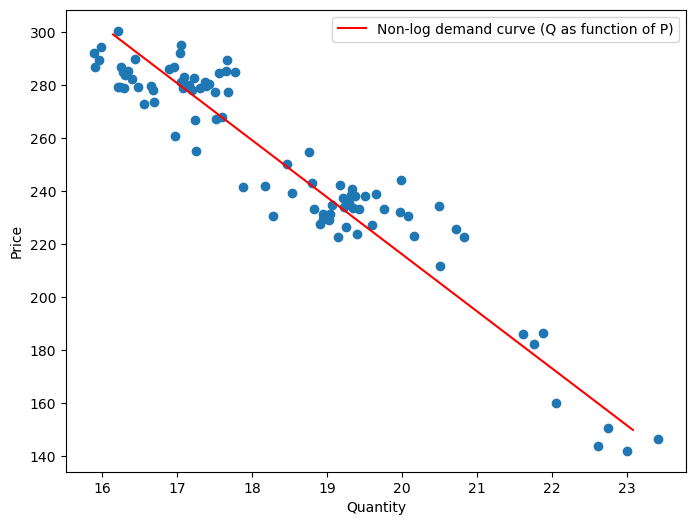

In [17]:
prices = np.arange(150,300)
predicted_quantities_non_log = non_log_demand_params_2[0] * prices + non_log_demand_params_2[1]

plt.figure(figsize=(8,6))
plt.scatter(beef.column("Quantity"), beef.column("Price"))
plt.plot(predicted_quantities_non_log, prices, color = 'red', label = 'Non-log demand curve (Q as function of P)')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.legend();

Now we will try fitting semi-log and log-log demand curves on the same data to see which model works the best. 

**Question 4.1:** Create a semi-log demand curve that expresses the quantity of beef in terms of the price by using `np.polyfit`. Assign the results to `semi_log_demand_params`. 



In [18]:
log_quantity = np.log(beef.column("Quantity"))

semi_log_demand_params = np.polyfit(beef.column("Price"), log_quantity, 1)
semi_log_demand_params

array([ -2.44012430e-03,   3.51900724e+00])

In [19]:
grader.check("q4_1")

q4_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 4.2:** Assign the number (i.e `1`, `2`, `3`, or `4`) to `slope_only` that best represents the interpretation of the slope term of the demand curve in question `4.1`.

1. A 1 cent increase in the price per pound of beef is associated with a 0.244% increase in the quantity demanded per quarter.
2. A 1 cent decrease in the price per pound of beef is associated with a 0.244% decrease in the quantity demanded per quarter.
3. A 1 cent increase in the price per pound of beef is associated with a 0.244% decrease in the quantity demanded per quarter.
4. A 1 cent increase in the price per pound of beef is associated with a 0.244% increase in the quantity demanded per quarter.

In [20]:
slope_only = 3

In [21]:
grader.check("q4_2")

q4_2 results: All test cases passed!

<!-- END QUESTION -->

Let's visualize our semi-log demand curve:

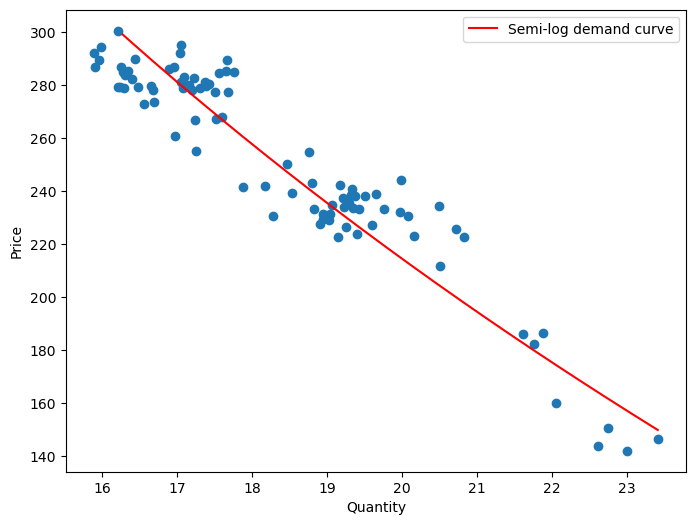

In [22]:
prices = np.arange(150,300)
predicted_quantities_semi_log = (np.e ** (prices * semi_log_demand_params[0])) * (np.e ** semi_log_demand_params[1])

plt.figure(figsize=(8,6))
plt.scatter(beef.column("Quantity"), beef.column("Price"))
plt.plot(predicted_quantities_semi_log, prices, color = 'red', label = 'Semi-log demand curve')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.legend();

**Question 5.1:** Create a log-log demand curve that expresses the quantity of beef in terms of the price by using `np.polyfit`. Assign the results to `log_log_demand_params`. 



In [23]:
log_quantity = np.log(beef.column("Quantity"))
log_price = np.log(beef.column("Price"))

log_log_demand_params = np.polyfit(log_price, log_quantity, 1)
log_log_demand_params

array([-0.53142446,  5.83637472])

In [24]:
grader.check("q5_1")

q5_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 5.2:** Let's say that Matt wants to find the what a 15% increase in the price of beef is associated with in terms of a percentage change in the quantity demanded per quarter. Use `log_log_demand_params` to find the exact result and assign the result to `q5_2`.


In [25]:
q5_2 = (log_log_demand_params[0]*15)+log_log_demand_params[1]

In [26]:
grader.check("q5_2")

q5_2 results: All test cases passed!

<!-- END QUESTION -->

Let's visualize our log-log demand curve:

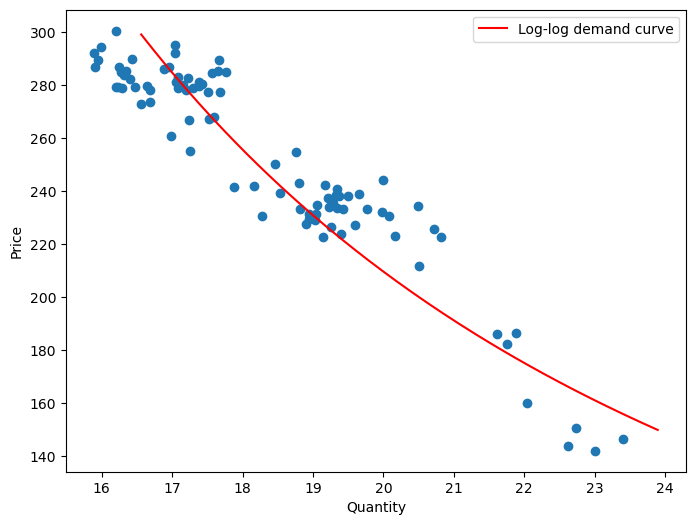

In [27]:
prices = np.arange(150,300)
predicted_quantities_log_log = (prices ** log_log_demand_params[0]) * (np.e ** log_log_demand_params[1])

plt.figure(figsize=(8,6))
plt.scatter(beef.column("Quantity"), beef.column("Price"))
plt.plot(predicted_quantities_log_log, prices, color = 'red', label = 'Log-log demand curve')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.legend();

**Question 5.3:** Is the demand for beef...
1. perfectly inelastic
2. inelastic
3. neither elastic nor inelastic
4. elastic
5. perfectly elastic

Assign your answer as a number from 1-5 to `demand_elasticity`.



In [28]:
demand_elasticity = 4

In [29]:
grader.check("q5_3")

q5_3 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 5.4:** Explain your answer from question `5.3`. There is no correct answer here; any answer with valid justification will be awarded credit.

_From the above graph(s) it's pretty clear that the quantity of beef demanded changes depending on the price. If it was a "perfectly inelastic" good, we would expect to see a horizontal_

<!-- END QUESTION -->

Let's visualize all 4 demand curves we've created:

In [ ]:
prices = np.arange(150,300)
predicted_quantities_log_log = (prices ** log_log_demand_params[0]) * (np.e ** log_log_demand_params[1])

plt.figure(figsize=(8,6))
plt.scatter(beef.column("Quantity"), beef.column("Price"), alpha = 0.5)
plt.plot(quantities, predicted_prices_non_log, color = 'purple', label = 'Non-log demand curve (P as function of Q)')
plt.plot(predicted_quantities_non_log, prices, color = 'orange', label = 'Non-log demand curve (Q as function of P)')
plt.plot(predicted_quantities_semi_log, prices, color = 'red', label = 'Semi-log demand curve')
plt.plot(predicted_quantities_log_log, prices, color = 'green', label = 'Log-log demand curve')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.legend();

<!-- BEGIN QUESTION -->

**Question 6:** Which demand curve do you think is the most appropriate to model the demand of beef? There is no correct answer here; any answer with valid justification will be awarded credit.


_Type your answer here, replacing this text._

<!-- END QUESTION -->

**Question 7:** For each of the following two supply curves, assign one as `inelastic` and the other as `elastic`. 

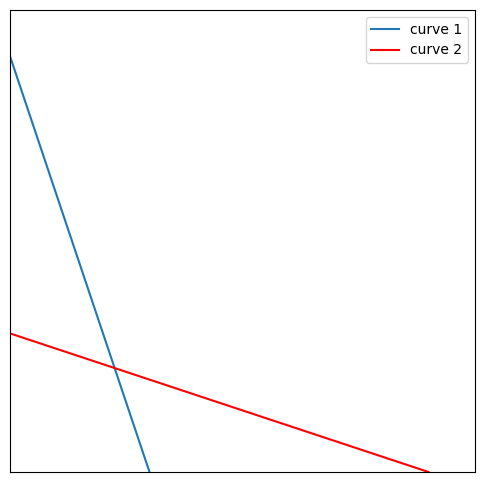

In [30]:
plt.figure(figsize = [6,6])
plt.plot(np.arange(0,10,1), np.flip(np.array([0,3,6,9,12,15,18,21,24,27])), label = 'curve 1')
plt.plot(np.flip(np.array([0,3,6,9,12,15,18,21,24,27])), np.arange(0,10,1), color = 'red', label = 'curve 2')
plt.xlim(0,30)
plt.ylim(0,30)
plt.xticks([], [])
plt.yticks([], [])
plt.legend();

In [32]:
curve_1 = "inelastic"
curve_2 = "elastic"
print("curve 1:", curve_1)
print("curve 2:", curve_2)

curve 1: inelastic
curve 2: elastic


In [33]:
grader.check("q7")

q7 results: All test cases passed!

**Congratulations! You finished Lab 1!**

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)